## ==== **Head Detection with VGGHeads** ====

#### ==== **Path Configuration** ====

In [10]:
import sys
import os

sys.path.append('/workspaces/fm-face-finder/proj')

#### ==== **Head Detection for Cropping** ====

Checking Torch Version

In [11]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1+cpu
False


#### ==== **Check Numpy Version for compatibility** ====

In [12]:
import numpy as np
print(np.__version__)


1.26.4


In [13]:
np.bool = np.bool_  # Fix for older code using np.bool
np.int = np.int_    # Fix for older code using np.int
np.float = np.float_  # Fix for older code using np.float
np.complex = np.complex_  # Fix for older code using np.complex
np.object = np.object_  # Fix for older code using np.object
np.unicode = np.unicode_  # Fix for older code using np.unicode
np.str = np.str_  # Fix for older code using np.str

#### ==== **Import Head Detector Library** ====

In [14]:
from head_detector import HeadDetector
import cv2
import os
import matplotlib.pyplot as plt
import util
%matplotlib inline

In [15]:
#initialize head detector
detector = HeadDetector()

cpu


if there is an error on :

Could not run ‘aten::q_scale’ with arguments from the ‘CUDA’ backend

try 

1. typing "print(self._device)" onto the detector package

2. use loaded_model = torch.jit.load(model_path,map_location=self._device) in **def _read_model**

#### ==== **Set Image Path** ====

In [16]:
#specify image path
image_directory = os.path.join("dataset", "roberto")
image_num = 1

In [17]:
image_loc = os.path.join(image_directory, f"Image_{image_num}.jpg")
print(f"image chosen location = {image_loc}")

image chosen location = dataset/roberto/Image_1.jpg


#### ==== **Start Detecting Head in the image** ====

In [18]:
predictions = detector(image_loc)

#### ==== **Set Crop Bounding Box** ====

In [19]:
sample_image_RGB = cv2.imread(image_loc)
rectangled_image = sample_image_RGB.copy()

Get the image height and width

In [20]:
sample_image_height = sample_image_RGB.shape[0]
sample_image_width = sample_image_RGB.shape[1]

In [21]:
print("Image height:", sample_image_height)
print("Image width:", sample_image_width)

Image height: 1390
Image width: 871


In [22]:
# TODO : Access the x, y, w, h variables directly instead of modifying the methods.

head_count = 0

for head in predictions.heads:

    if head_count > 0 :
        break

    head_count += 1
    
    rectangles = util.extend_to_custom_rect(
        util.extend_bbox_ratio(bbox=head.bbox, 
                                  height=sample_image_height, 
                                  width=sample_image_width,
                                  offset=0.5,
                                  height_scale=1.5
                                  ),
                                  width=260,
                                  height=310
    )
    x, y, w, h = rectangles
    print(f"x={x}, y={y}, w={w}, h={h}")
    cv2.rectangle(rectangled_image,
                (x, y), 
                (x + w, y + h), 
                (0, 255, 0), 
                2)


x=1, y=104, w=859, h=1025


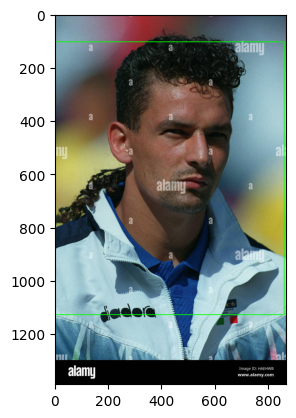

In [23]:
plt.imshow(util.convertToRGB(rectangled_image))

In [24]:
cropped_image = sample_image_RGB[y:y+h, x:x+w]

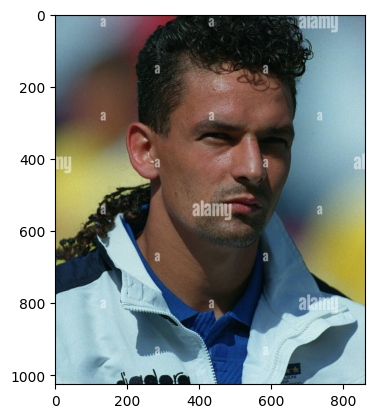

In [25]:
plt.imshow(util.convertToRGB(cropped_image))

#### ==== **Resizing Image** ====

In [41]:
cropped_image_resized = cv2.resize(cropped_image, (260, 310), interpolation = cv2.INTER_CUBIC)

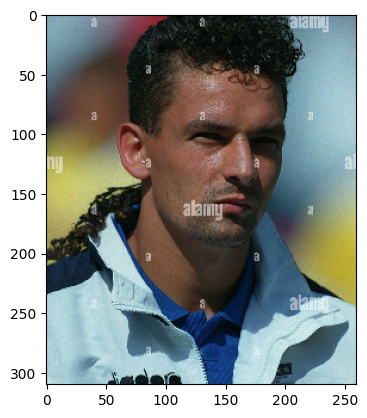

In [42]:
plt.imshow(util.convertToRGB(cropped_image_resized))

#### ==== **VGGHeads Method** ====

GET RESULT :

"landmarks": [draw_3d_landmarks],

"points": [draw_2d_landmarks],

"pose": [draw_pose],

'full': [draw_bboxes, draw_3d_landmarks],

'bbox': [draw_bboxes],

In [ ]:
result_image = predictions.draw('bbox')
cv2.imwrite('result_image.jpg', result_image)

#### ==== **Modify get_aligned_head method** ====

Customize the size of width and height after the line

x, y, w, h = head_bbox

I changed the 

w to w = int(w * 1.2)

h to h = int(h * 1.5)


In [9]:
#get only the aligned head
aligned_heads = predictions.get_aligned_heads()

In [10]:
# Process or save aligned head crops
for i, head in enumerate(aligned_heads):
    cropped_head = cv2.cvtColor(head, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"aligned_head_{i}.png", cropped_head)

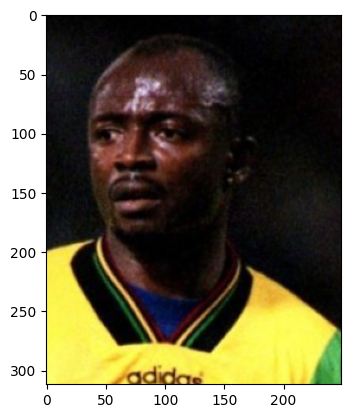

In [11]:
plt.imshow(head)